# Detecting Brain Tumors based on MRI Scans through AI

# Importing the Libraries and the Dataset

In [1]:
# Data analysis, preprocessing and manipulation
import pandas as pd

# Operations on multidimensional array objects
import numpy as np

# Graphical plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Computer vision, machine learning and image processing
import cv2

# Image preprocessing
from skimage import io

# Training and Inference of Deep Neural Networks
import tensorflow as tf

# Interface for the TensorFlow library
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Generating random numbers
import random

In [2]:
%cd Dataset

c:\Users\ADMIN\Desktop\Digital Assignments\Fall Semester (2021-2022)\AI (Project)\Implementation\Dataset


In [3]:
# Reading the CSV Data File
dataset = pd.read_csv("data_mask.csv")

In [4]:
# Dataset Features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [5]:
# If mask = 1, Tumor exists
# If mask = 0, Tumor doesn't exist
dataset

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

# Dataset Visualization

In [6]:
# plotly is used to plot interactive bar charts
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = dataset['mask'].value_counts().index, y = dataset['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

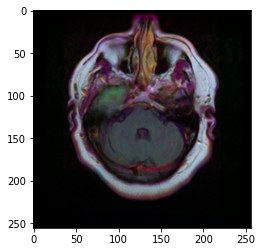

In [7]:
plt.imshow(cv2.imread(dataset.image_path[623]))

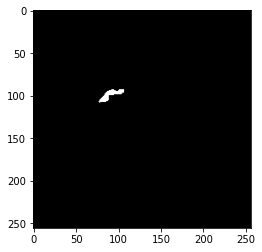

In [8]:
plt.imshow(cv2.imread(dataset.mask_path[623]))

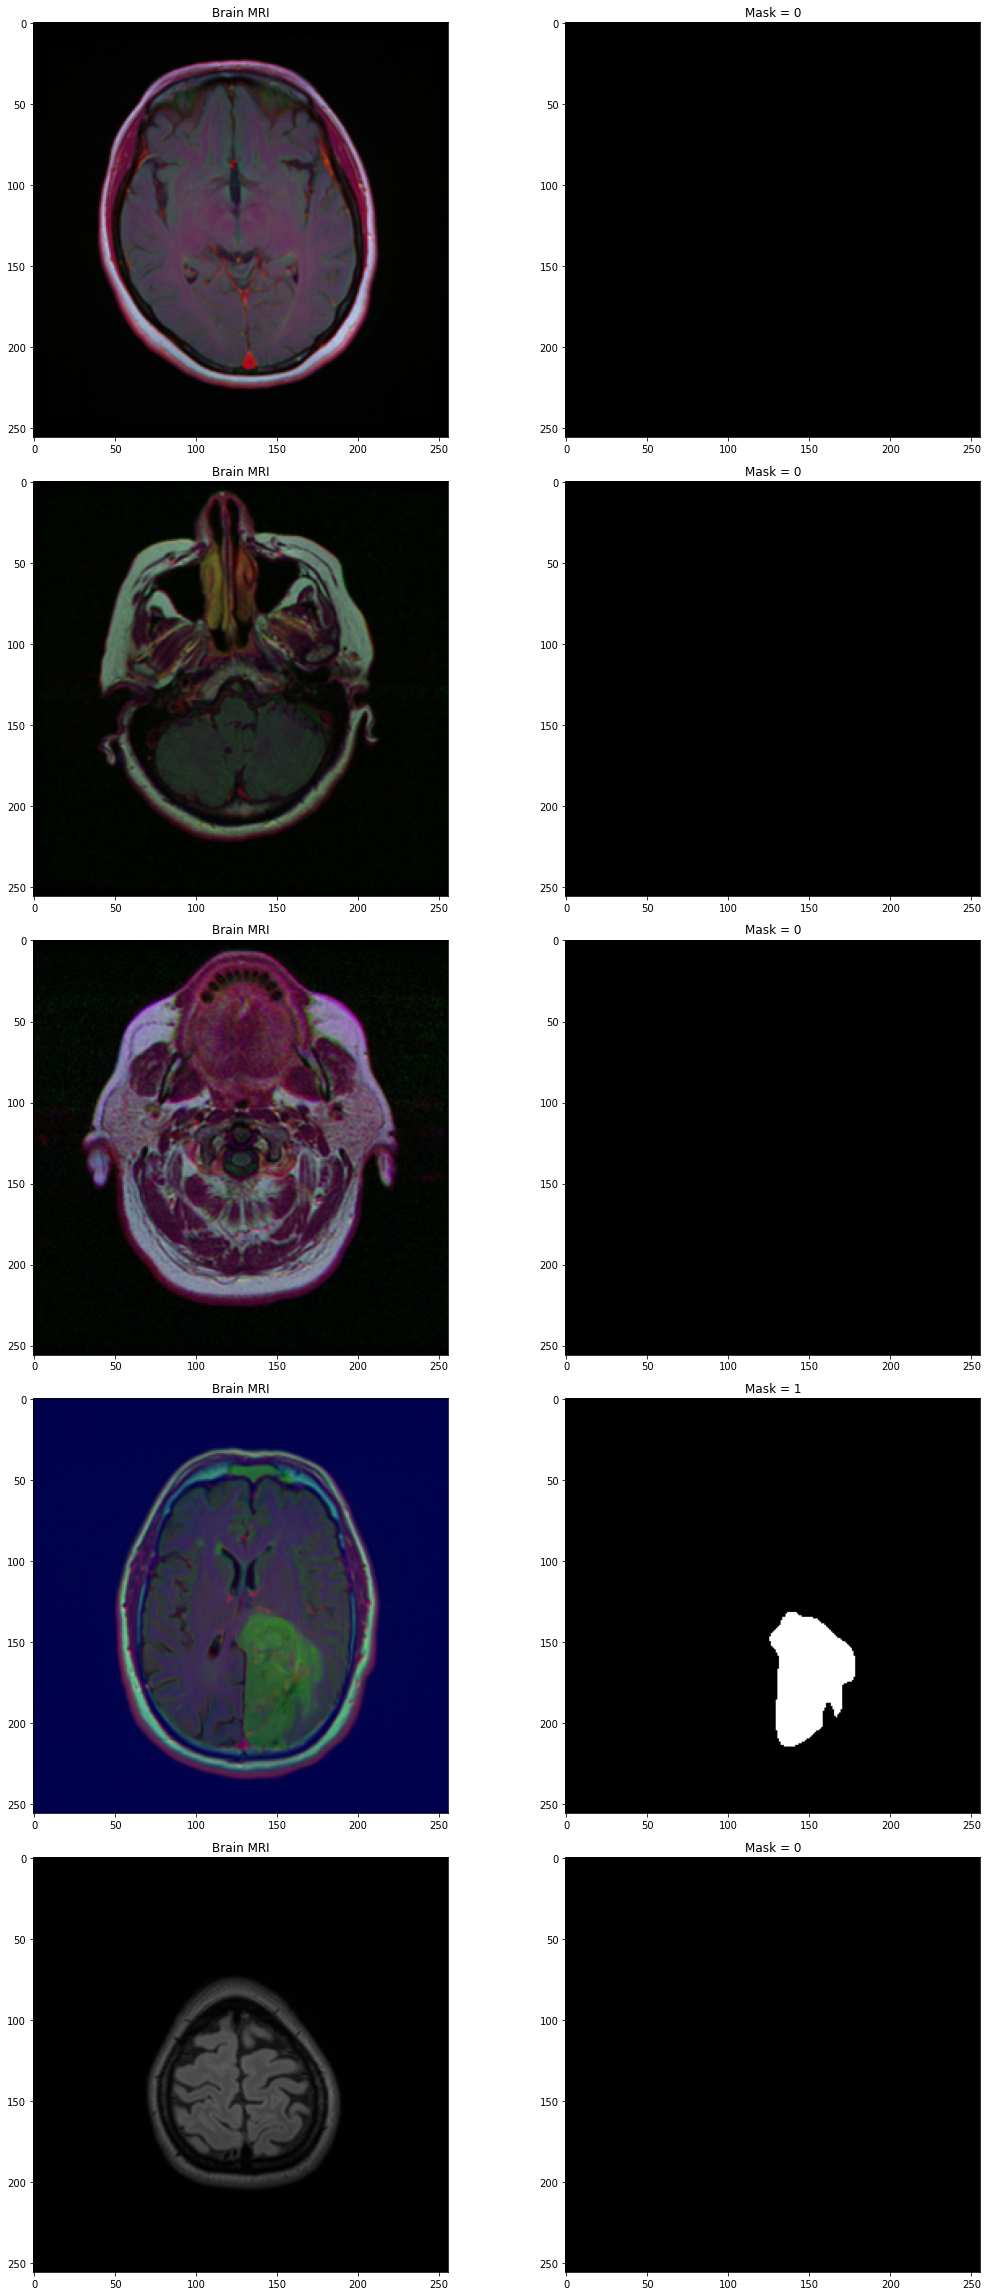

In [9]:
# Visualizing the MRIs and the Masks
import random
fig, axs = plt.subplots(5,2, figsize=(16,32))
count = 0
for x in range(5):
  i = random.randint(0, len(dataset))
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(dataset.image_path[i])) 
  axs[count][1].title.set_text("Mask = " + str(dataset['mask'][i]))
  axs[count][1].imshow(cv2.imread(dataset.mask_path[i]))
  count += 1

fig.tight_layout()

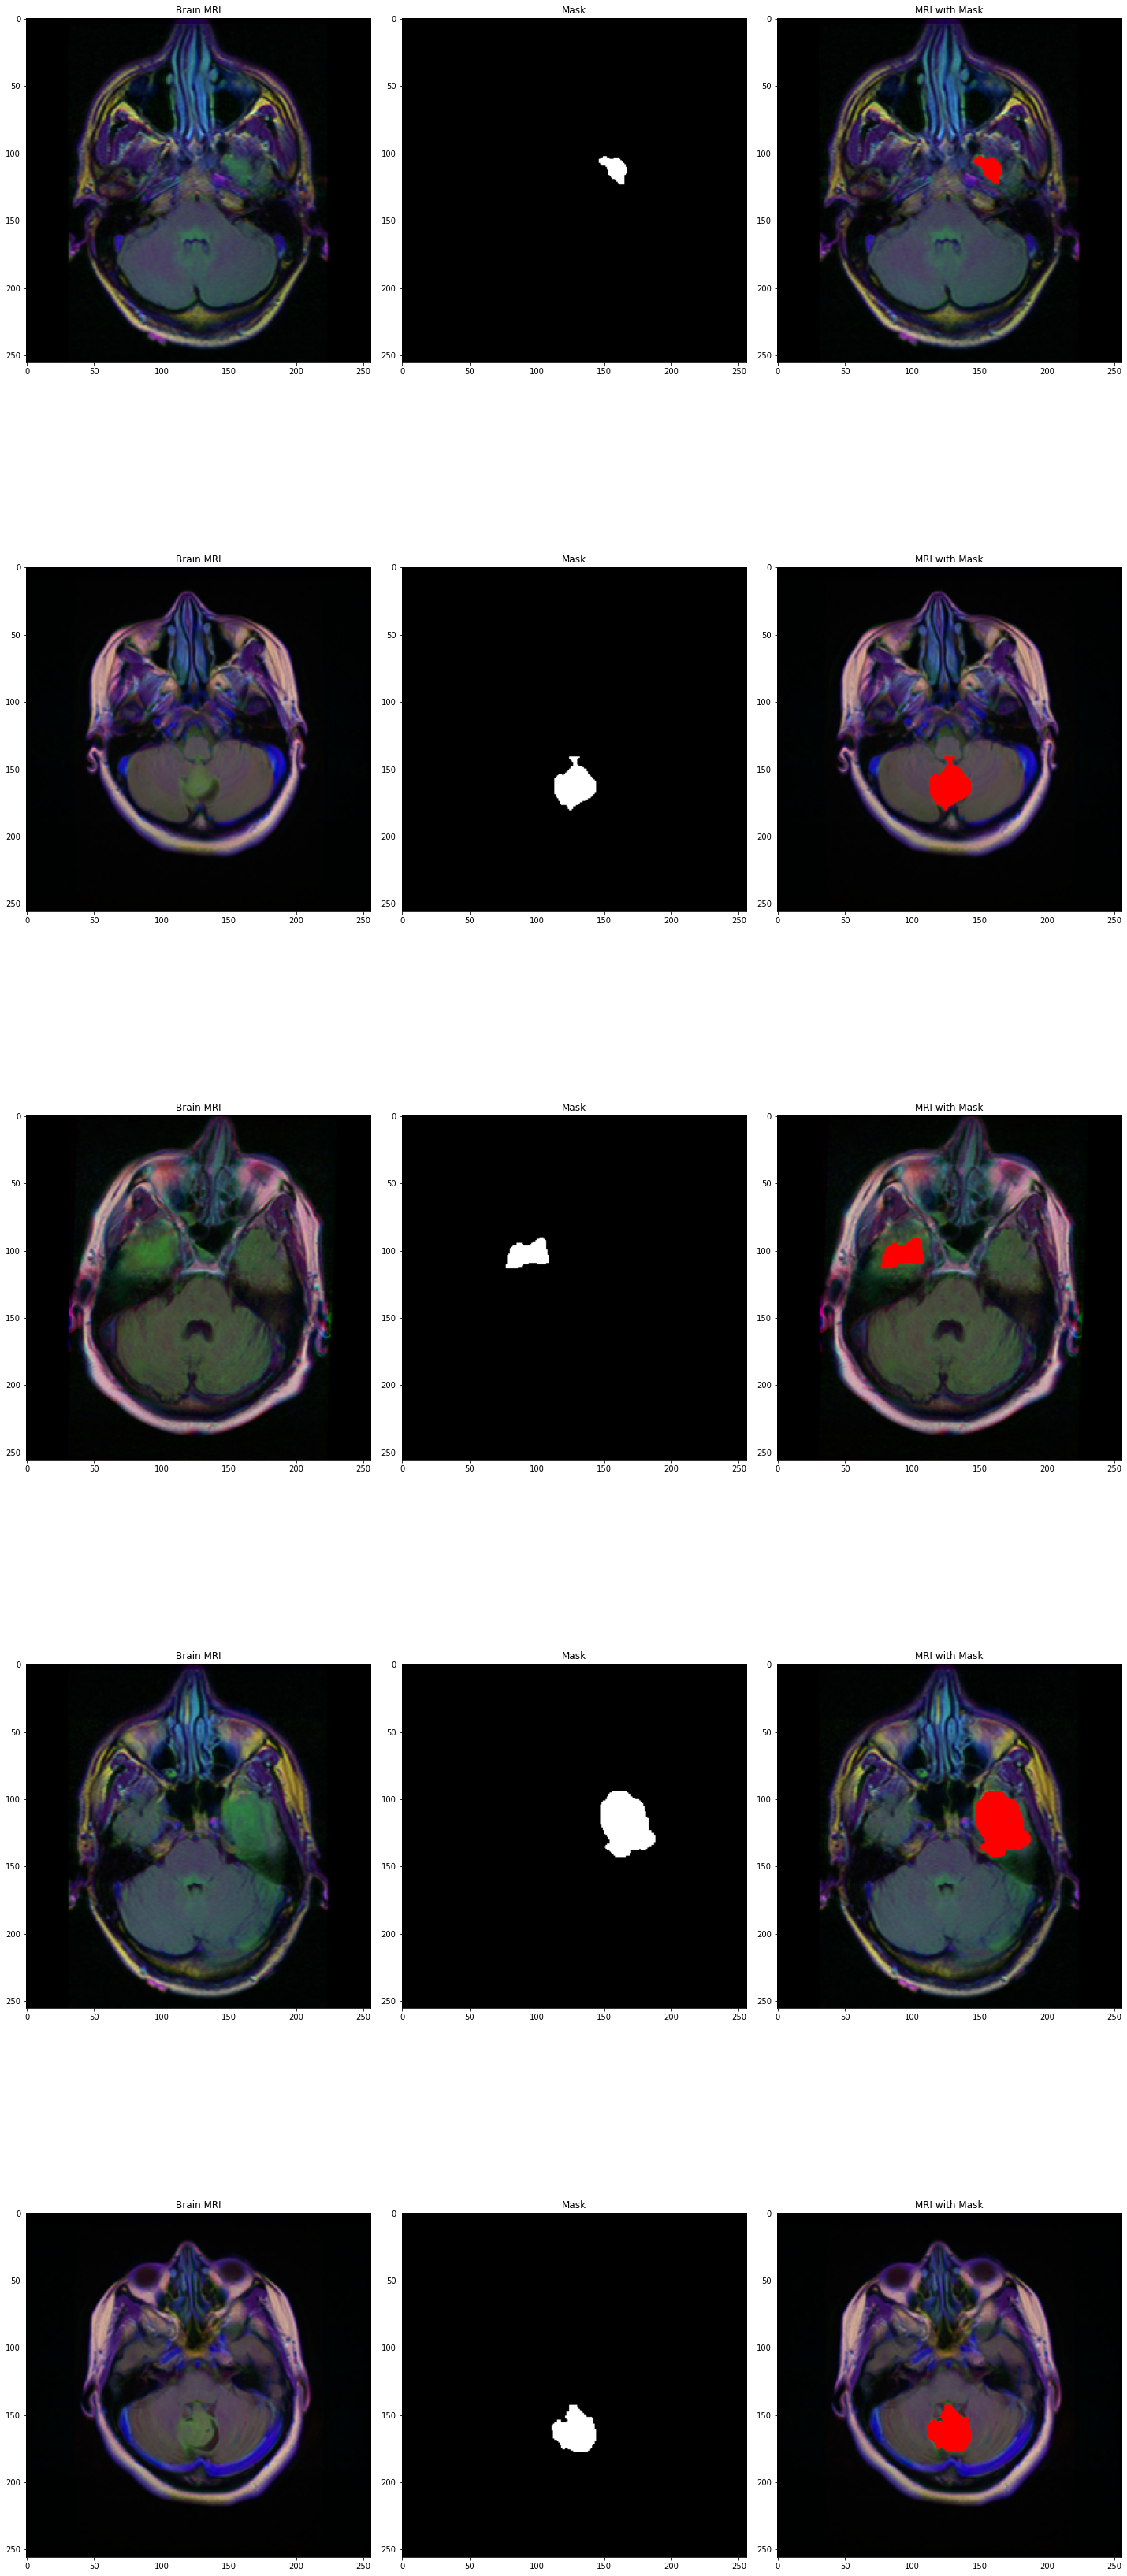

In [10]:
# Plotting the MRI and the corresponding mask on top of each other
count = 0
fig, axs = plt.subplots(5, 3, figsize = (20, 50))
for i in range(len(dataset)):
  if dataset['mask'][i] ==1 and count < 5:
    img = io.imread(dataset.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)

    mask = io.imread(dataset.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()

# Training a Classifier Model to detect whether Tumor exists or not

In [11]:
# Dropping the patient id column
trainingDataset = dataset.drop(columns = ['patient_id'])
trainingDataset.shape

(3929, 3)

In [12]:
trainingDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 92.2+ KB


In [13]:
# Converting the data in the mask column to String 
trainingDataset['mask'] = trainingDataset['mask'].apply(lambda x: str(x))

In [14]:
# Splitting the Dataset into Training and Testing Data
# Training and Validation Dataset Size = 80%
# Testing Dataset Size = 20%
from sklearn.model_selection import train_test_split
train, test = train_test_split(trainingDataset, test_size = 0.20)

In [15]:
# Creating an Image Generator
from keras_preprocessing.image import ImageDataGenerator

# Creating a Data Generator which scales the data from 0 to 1 and makes validation split of 0.15
dataGenerator = ImageDataGenerator(rescale=1./255., validation_split = 0.20)

In [16]:
trainGenerator = dataGenerator.flow_from_dataframe(
dataframe = train,
directory = './',
x_col = 'image_path',
y_col = 'mask',
subset = "training",
batch_size = 16,
shuffle = True,
class_mode = "categorical",
target_size = (256,256))


validGenerator = dataGenerator.flow_from_dataframe(
dataframe = train,
directory = './',
x_col = 'image_path',
y_col = 'mask',
subset = "validation",
batch_size = 16,
shuffle = True,
class_mode = "categorical",
target_size = (256,256))

# Creating a Data Generator for the Test Images
testDatagen = ImageDataGenerator(rescale=1./255.)
testGenerator = testDatagen.flow_from_dataframe(
dataframe = test,
directory = './',
x_col = 'image_path',
y_col = 'mask',
batch_size = 16,
shuffle = False,
class_mode = 'categorical',
target_size = (256,256))

Found 2515 validated image filenames belonging to 2 classes.
Found 628 validated image filenames belonging to 2 classes.
Found 786 validated image filenames belonging to 2 classes.


In [17]:
# Downloading ResNet50 Base Model
baseModel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

In [18]:
baseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [19]:
# Adding classification head to the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (4,4))(headModel)
headModel = Flatten(name= 'flatten')(headModel)
headModel = Dense(256, activation = "swish")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(256, activation = "swish")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(2, activation = 'softmax')(headModel)

model = Model(inputs = baseModel.input, outputs = headModel)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [21]:
# Compiling the Model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

# Assessing the Performance of the Trained ResNet Model

In [22]:
# Adding weights to the network
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [23]:
# Prediction
testPredict = model.predict(testGenerator, steps = testGenerator.n // 16, verbose =1)

49/49 [==============================] - 180s 3s/step


In [24]:
# Obtaining the Predicted Class from the Model Prediction
predict = []

for i in testPredict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [25]:
predict

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0

In [26]:
# Obtaining the Accuracy of the Model
original = np.asarray(test['mask'])[:len(predict)]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, predict)
accuracy * 100

99.10714285714286

# Building a Segmentation Model to detect the exact location of the Tumor

In [27]:
# Getting the DataFrame containing MRIs which have masks associated with them
mask = dataset[dataset['mask'] == 1]
mask.shape

(1373, 4)

In [28]:
# Splitting the data into Training and Testing Data
from sklearn.model_selection import train_test_split
train, validation = train_test_split(mask, test_size=0.20)
test, validation = train_test_split(validation, test_size=0.5)

In [29]:
# Creating separate lists for imageId and classId to pass into the generator

trainingID = list(train.image_path)
trainingMask = list(train.mask_path)

validationID = list(validation.image_path)
validationMask= list(validation.mask_path)

In [30]:
# Creating Image Generators
from utilities import DataGenerator
trainingGenerator = DataGenerator(trainingID,trainingMask)
validationGenerator = DataGenerator(validationID,validationMask)

In [31]:
def resblock(X, f):

  # Making a copy of the input
  copy = X

  # Main Path
  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ="he_normal")(X)
  X = BatchNormalization()(X)
  X = Activation("swish")(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = "same", kernel_initializer ="he_normal")(X)
  X = BatchNormalization()(X)

  # Shortest Path
  copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ="he_normal")(copy)
  copy = BatchNormalization()(copy)

  # Adding the output from main path and short path 
  X = Add()([X, copy])
  X = Activation("swish")(X)

  return X

In [32]:
# Function to Upscale and Concatenate the passed values
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [33]:
inputShape = (256,256,3)

# Input Tensor Shape
tensorShape = Input(inputShape)

# Stage 1
conv1 = Conv2D(16,3,activation= 'swish', padding = 'same', kernel_initializer ='he_normal')(tensorShape)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(16,3,activation= 'swish', padding = 'same', kernel_initializer ='he_normal')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPool2D(pool_size = (2,2))(conv1)

# Stage 2
conv2 = resblock(pool1, 32)
pool2 = MaxPool2D(pool_size = (2,2))(conv2)

# Stage 3
conv3 = resblock(pool2, 64)
pool3 = MaxPool2D(pool_size = (2,2))(conv3)

# Stage 4
conv4 = resblock(pool3, 128)
pool4 = MaxPool2D(pool_size = (2,2))(conv4)

# Stage 5 (Bottle Neck)
conv5 = resblock(pool4, 256)

# Upscale Stage 1
up1 = upsample_concat(conv5, conv4)
up1 = resblock(up1, 128)

# Upscale Stage 2
up2 = upsample_concat(up1, conv3)
up2 = resblock(up2, 64)

# Upscale Stage 3
up3 = upsample_concat(up2, conv2)
up3 = resblock(up3, 32)

# Upscale Stage 4
up4 = upsample_concat(up3, conv1)
up4 = resblock(up4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "softmax")(up4)

segmentationModel = Model(inputs = tensorShape, outputs = output )


# Training the ResUNet Segmentation Model

In [34]:
from utilities import focal_tversky, tversky

In [35]:
# Compiling the Model
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
segmentationModel.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

C:\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [36]:
# Adding weights to the network
from utilities import focal_tversky, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

segmentationModel = tf.keras.models.model_from_json(json_savedModel)
segmentationModel.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
segmentationModel.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [37]:
# Prediction
from utilities import prediction
imageID, mask, hasMask = prediction(test, model, segmentationModel)

In [38]:
# Creating a Data Frame for the Predicted Result
dataframePredicted = pd.DataFrame({'image_path': imageID,'predicted_mask': mask,'has_mask': hasMask})
dataframePredicted

image_path  \
0    TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_16...   
1    TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_48...   
2    TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_35...   
3    TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_37...   
4    TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_17...   
..                                                 ...   
132  TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_12...   
133  TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_20...   
134  TCGA_HT_7684_19950816/TCGA_HT_7684_19950816_20...   
135  TCGA_HT_7693_19950520/TCGA_HT_7693_19950520_14...   
136  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_24...   

                                        predicted_mask  has_mask  
0    [[[[8.785064e-07], [3.153003e-06], [5.1284264e...         1  
1    [[[[3.9119607e-07], [1.4473533e-06], [2.817144...         1  
2    [[[[8.5909994e-07], [3.384495e-06], [8.407663e...         1  
3    [[[[4.4609774e-06], [8.6445725e-06], [1.172767...         1  
4    [[[[5.8435205e-07], [2.086806e-06], [4.2034367...         1  
..                                                 ...       ...  
132  [[[[9.371767e-07], [4.821397e-06], [1.2695471e...         1  
133  [[[[9.596438e-07], [4.8846264e-06], [1.062279e...         1  
134  [[[[6.9109603e-07], [2.4127626e-06], [4.338820...         1  
135  [[[[7.1488375e-07], [2.5977408e-06], [4.640461...         1  
136  [[[[5.945738e-06], [1.160781e-05], [1.6996357e...         1  

[137 rows x 3 columns]

In [39]:
# Merging the Original Dataset with the Predicted Results 
mergedDataset = test.merge(dataframePredicted, on = 'image_path')
mergedDataset.head()

patient_id                                         image_path  \
0  TCGA_DU_A5TR_19970726  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_16...   
1  TCGA_DU_7010_19860307  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_48...   
2  TCGA_HT_8563_19981209  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_35...   
3  TCGA_HT_A5RC_19990831  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_37...   
4  TCGA_FG_5962_20000626  TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_17...   

                                           mask_path  mask  \
0  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_16...     1   
1  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_48...     1   
2  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_35...     1   
3  TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_37...     1   
4  TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_17...     1   

                                      predicted_mask  has_mask  
0  [[[[8.785064e-07], [3.153003e-06], [5.1284264e...         1  
1  [[[[3.9119607e-07], [1.4473533e-06], [2.817144...         1  
2  [[[[8.5909994e-07], [3.384495e-06], [8.407663e...         1  
3  [[[[4.4609774e-06], [8.6445725e-06], [1.172767...         1  
4  [[[[5.8435205e-07], [2.086806e-06], [4.2034367...         1

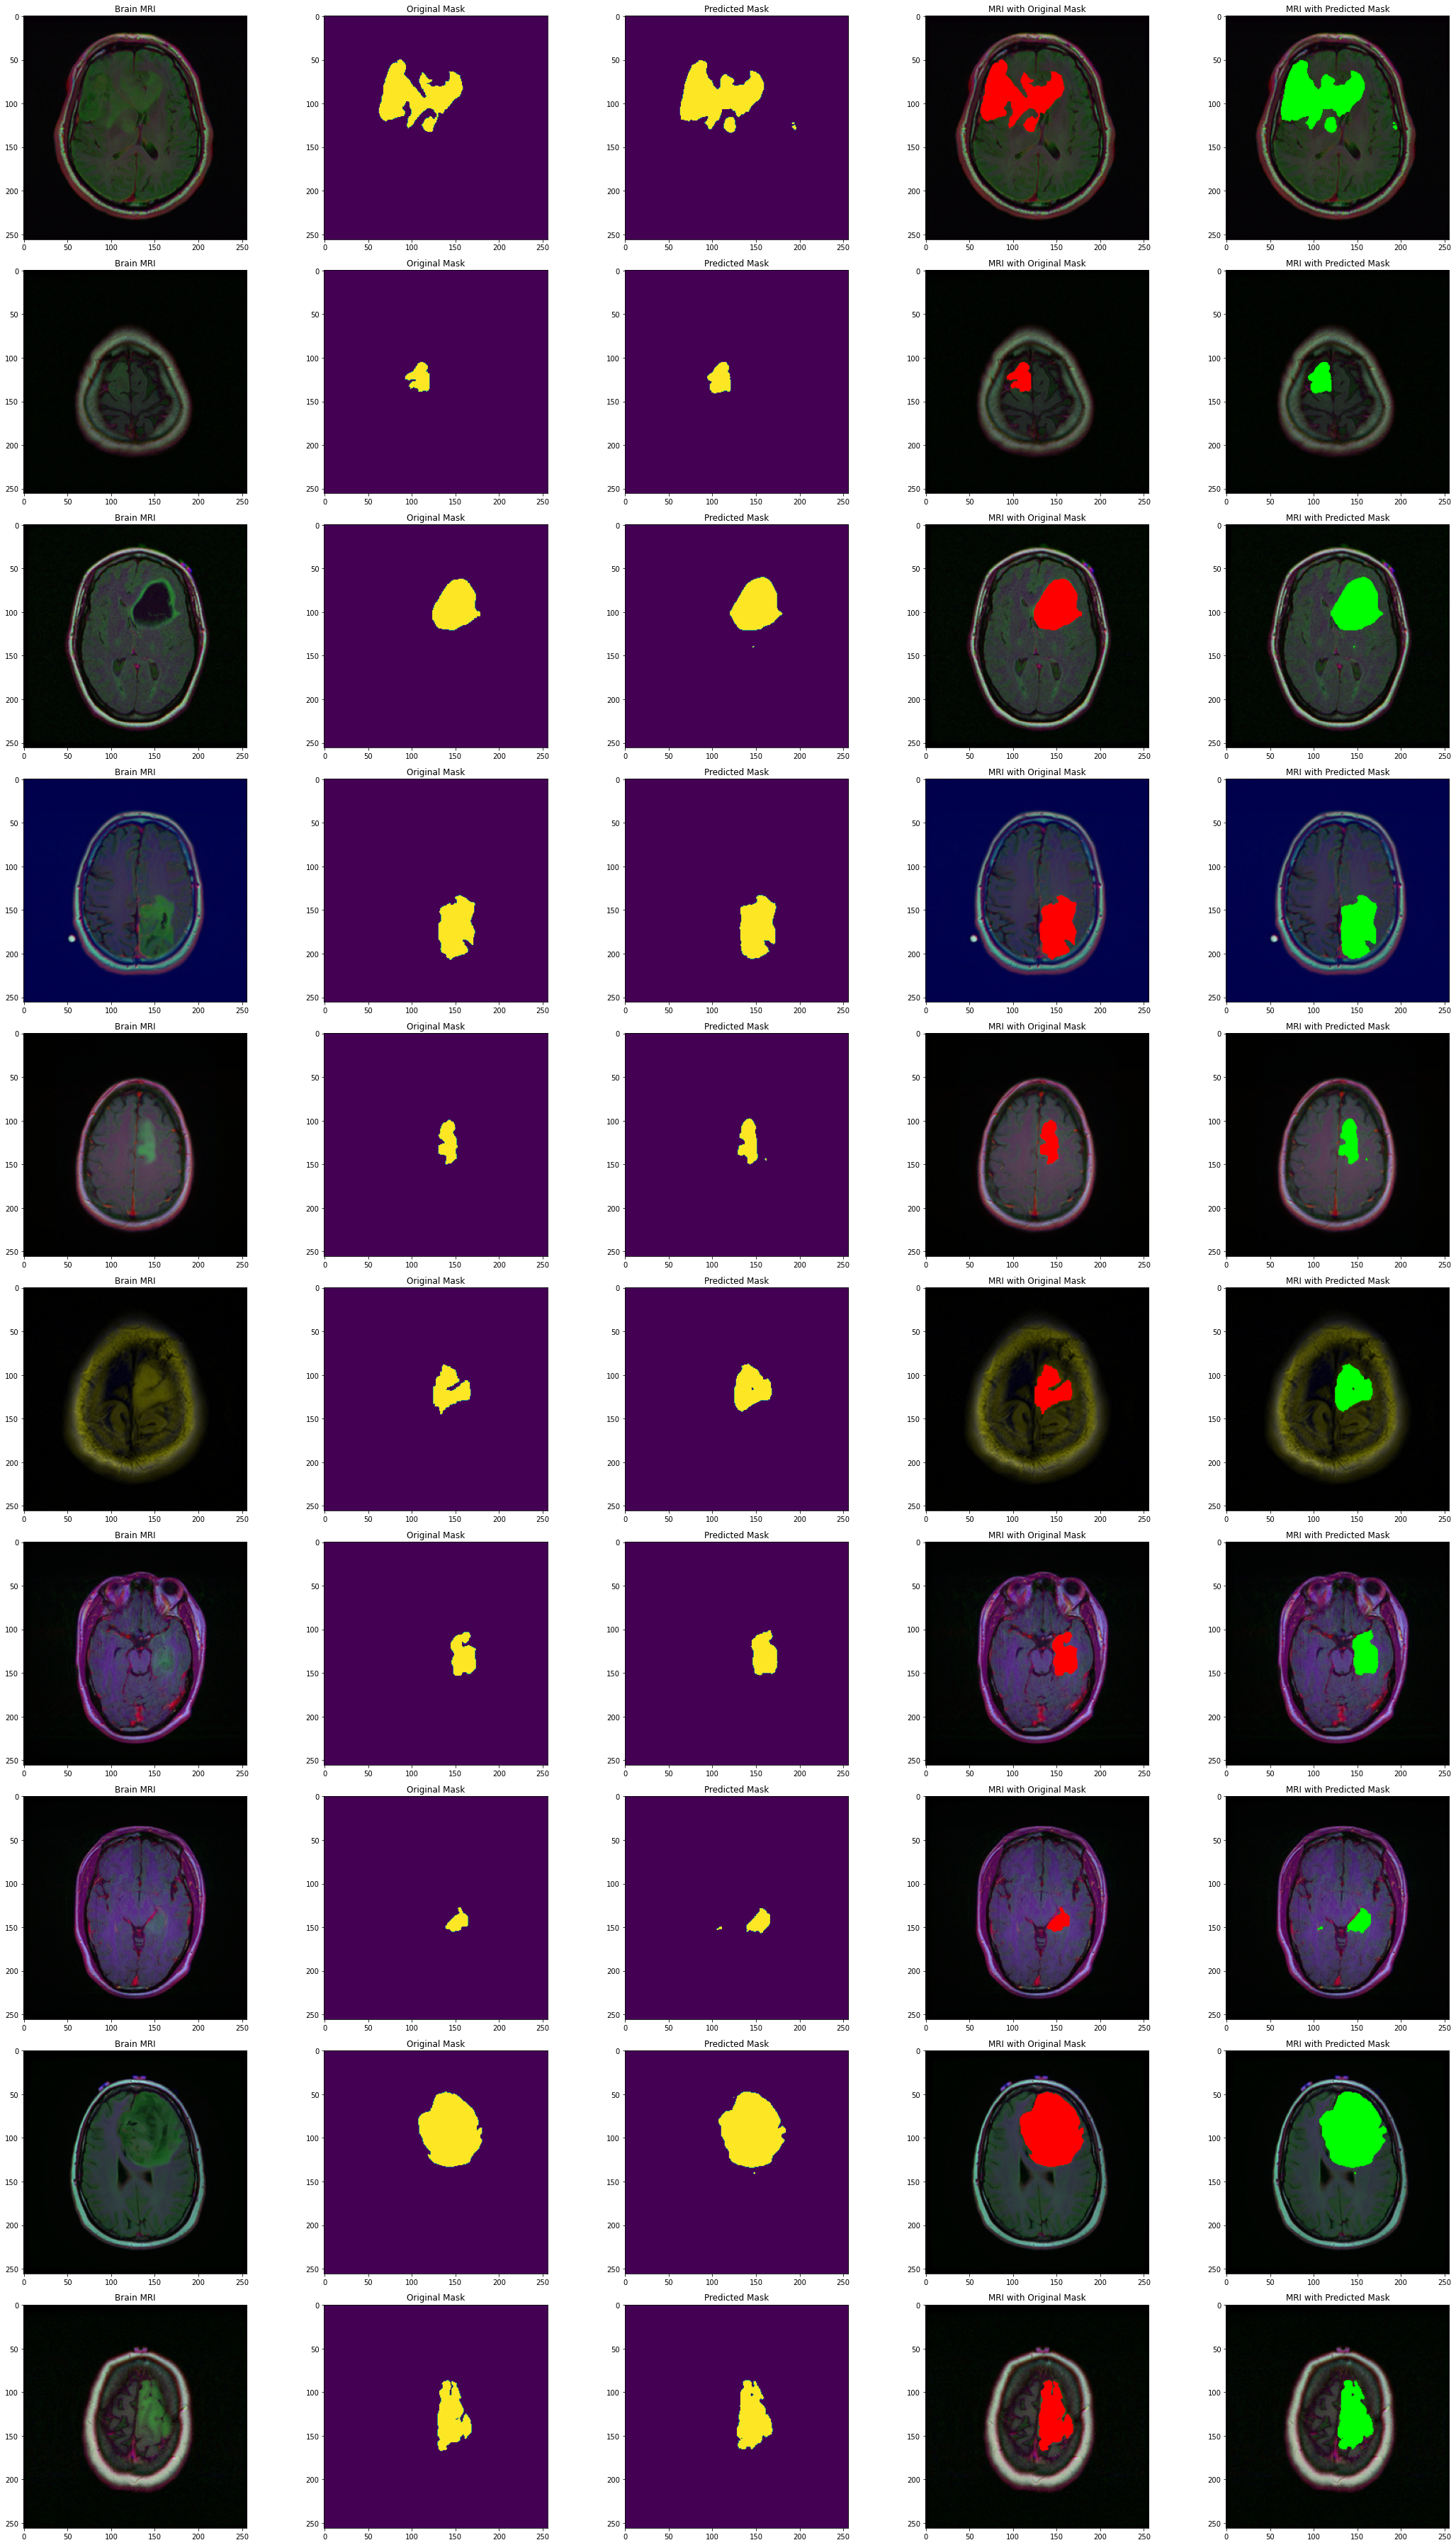

In [40]:
# Final Result
count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(mergedDataset)):
  if mergedDataset['has_mask'][i] == 1 and count < 10:
    
    # Reading the images and converting them to RGB format
    img = io.imread(mergedDataset.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtaining the Mask for the image 
    mask = io.imread(mergedDataset.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Obtaining the Predicted Mask for the image 
    predicted_mask = np.asarray(mergedDataset.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("Predicted Mask")
    axs[count][2].imshow(predicted_mask)
    
    # Applying the Mask over the image 
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI with Original Mask")
    axs[count][3].imshow(img)

    img_ = io.imread(mergedDataset.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()